# Spiking Handwritten Digits Classifier using `superneuromat`

Welcome to ORNL's ICONS 2025 tutorial!

Try it on colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1A8skdSiRBrl6bbrIs_BXauZIF-5IhE9R?usp=sharing)

In this section of the tutorial, we'll go through how to create a classifier for handwritten digits using the [SuperNeuroMAT](https://github.com/ORNL/superneuromat) library, a matrix-based Spiking Neural Network (SNN) simulator.


**Documentation** for SuperNeuroMAT is available online:  
[<img src="https://gist.githubusercontent.com/cxmeel/0dbc95191f239b631c3874f4ccf114e2/raw/documentation.svg" alt="Documentation" height="40" />](https://ORNL.github.io/superneuromat/)

Or, if you run the next cell before the runtime starts, you'll get helpful hint popups when you hover over functions!

### Importing SuperNeuroMAT

In [ ]:
!uv pip install superneuromat  # for colab
# !pip install superneuromat scikit-learn matplotlib tqdm  # for those at home

error: Failed to parse: `#`
  Caused by: Expected package name starting with an alphanumeric character, found `#`
#
^


In [ ]:
import sklearn
import superneuromat as snm
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
from tqdm import tqdm


snm.__version__

'3.3.0'

# Understanding the problem

vaguely based on the scikit-learn [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) tutorial

First, let's load our dataset: [Digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset).
This is a dataset of almost 1,800 images of hand-written digits.

It's important to know what the data you're working with looks like, so please take a moment to examine the shape of the dataset.

The digits dataset contains 8x8 4-bit grayscale images of $1797$ handwritten digits. Each digit is represented as a vector of $64$ values ranging from $[0, 15]$.

Data  shape: (1797, 64)
Input shape: 64
data[0]: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
data values range between 0 and 15
Image shape: (8, 8)
Label: 0


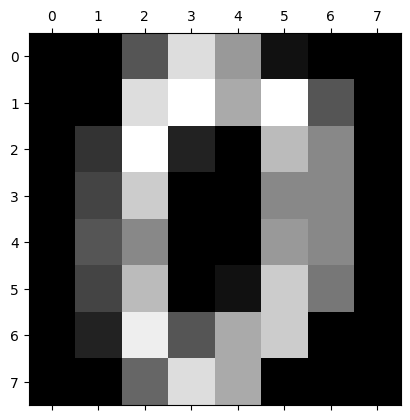

In [3]:
# @title
digits = sklearn.datasets.load_digits(n_class=10)
example = digits.data[0]
input_min, input_max = min(example), max(example)

input_size = example.size
print(f'Data  shape: {digits.data.shape}')
print(f'Input shape: {input_size}')
print(f'data[0]: {example}')
print(f'data values range between {input_min:g} and {input_max:g}')

idx = 0

plt.matshow(digits.images[idx], cmap='grey')
print(f"Image shape: {digits.images[idx].shape}")
print(f"Label: {digits.target[idx]}")

# Our Solution

There are many possible approaches to solve this problem. Since this tutorial is all about getting to know SuperNeuroMAT, we're going to build a simple two-layer feedforward network of LIF (leaky-integrate-and-fire) neurons.

We'll send the value of each pixel as spikes to an associated input neuron. Then, we'll train the network using STDP by sending spikes to a target neuron, so that when we want to make an inference, we send in an image and get spikes at the correct output neuron.

# Writing some helper functions

SuperNeuroMAT is not yet specialized enough to have functions for creating common network structures. Luckily, creating a feedforward network is still quite easy!

## `create_layer()`

First, we'll need a function to create a layer of neurons.

**Complete the `create_layer` function by filling in the arguments.**

Don't worry about getting the layer sizes right just yet, we'll make the real network later!

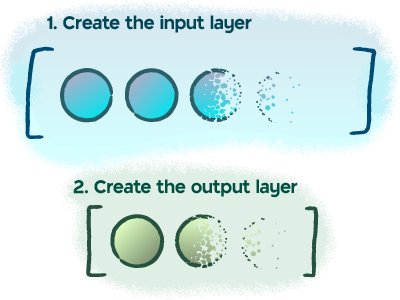

In [4]:
# Fix the function so that this cell runs without error!
def create_layer(
    snn: snm.SNN,
    size: int,
    threshold: float = 0.0,
    leak: float = float('inf'),
    reset_state: float = 0.0,
    refractory_period: int = 0,
    refractory_state: int = 0,
    initial_state: float | None = 0.0,
):
    """Make a layer of `size` neurons on an `snn` model."""
    # Hint: If you ran the cell to import superneuromat, you can now
    # hover over create_neuron to see its function signature!
    a = [

        snn.create_neuron(
            threshold=,
            leak=,
            reset_state=reset_state,
            refractory_period=refractory_period,
            refractory_state=refractory_state,
            initial_state=initial_state,
        )

        for _i in range(size)
    ]
    return snm.mlist(a)  # turn our layer into a superneuromat list for extra features

# make an SNN and make a layer of 3 neurons
snn = snm.SNN()
print(create_layer(snn, 3))

SyntaxError: expected argument value expression (194044740.py, line 18)

Note the thresholds for the input and output.

## `fully_connect()`

Now that we have a function to create layers of neurons, we can use it to create an input and output layer.

But now we need to fully connect the input layer to the output layer.

The function has been written for you, so all you need to do is  
**Finish the code that calls `fully_connect()`.**

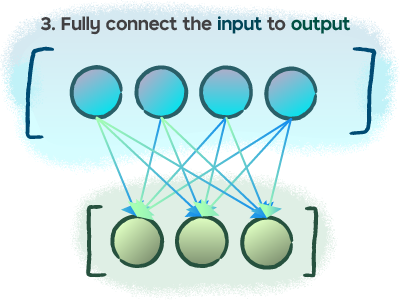

In [ ]:
def fully_connect(
    a: list, b: list,
    weight: float = 1.0,
    delay: int = 1,
    stdp_enabled: bool = False,
    exist='error',
):
    """Connect each neuron in list `a` to each neuron in list `b`."""
    synapses = []
    for source in a:
        for dest in b:
            synapses.append(
                snn.create_synapse(source, dest, weight, delay, stdp_enabled, exist)
            )
    return synapses

# Make another SNN, create an input and output layer, and fully connect them.
# You should see four synapses at the output!
snn =
inputs = create_layer(snn, 2)
outputs = create_layer(snn, 2)
fully_connect(,)  # finish this function call!

[<Synapse 0 on SNN at 0x7fbd2bf77490>,
 <Synapse 1 on SNN at 0x7fbd2bf77490>,
 <Synapse 2 on SNN at 0x7fbd2bf77490>,
 <Synapse 3 on SNN at 0x7fbd2bf77490>]

#### Spoiler


1. In the `create_layer():` function definition above, pass in the `threshold` and `leak` to `create_neuron()`:

        snn.create_neuron(
            threshold=threshold,
            leak=leak,
            ...

2. Create a new SNN on line `19` of the cell above with `snn = snm.SNN()`
3. Provide the input and output layers to `fully_connect(inputs, outputs)`


#### Splitting the Data


In [ ]:
digits = sklearn.datasets.load_digits(n_class=10)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.5, shuffle=False
)

---


# Network construction

Now that we have the tools to do so, let's actually build our network now.

<a id='network_construction' name='network_construction'></a>



In [ ]:
n_classes = len(set(digits.target))

snn = snm.SNN()
# Remember, our input_size is (64,) corresponding to the 64 grayscale pixels.
inputs = create_layer(snn, input_size, threshold=1.0)  # Note our threshold!
# And we need an output neuron for each possible digit.
outputs = create_layer(snn, n_classes, threshold=1.0)
# And we'll fully connect the input to the output.
# Let's give each synapse the same weight, and enable STDP learning on all of them.
fully_connect(inputs, outputs, weight=1.0, stdp_enabled=True)

snn.pretty_print(10)

SNN with 74 neurons and 640 synapses @ 0x7fbd2e3c1b90
STDP is globally enabled
apos: []
aneg: []
640 synapses have STDP enabled.

Neuron Info (74):
   idx       state      thresh        leak  ref_state  ref_period spikes
     0           0           1         inf          0           0 []
     1           0           1         inf          0           0 []
     2           0           1         inf          0           0 []
     3           0           1         inf          0           0 []
     4           0           1         inf          0           0 []
  ...          ...         ...          ...       ...         ... [...]
    69           0          99         inf          0           0 []
    70           0          99         inf          0           0 []
    71           0          99         inf          0           0 []
    72           0          99         inf          0           0 []
    73           0          99         inf          0           0 []

Synapse Info (64

# Encoding Pixel Values to Spikes

The image data was given as an `int` value per pixel in the range $[0, 15]$.

We need to turn this into a spike or series of spikes for each pixel, so that we encode an image to spikes to send to the input neurons.

For the input side, let's encode the value of the pixel into the amplitude of the spike. To help with this, I've given you an `encode_digit_spike_amplitude` function.

On the output side, for training, we'll need to spike the correct output neuron associated with the true label of the image. The `encode_target_to_spikes` function helps do just that.

By sending the input spikes, and then spiking the correct output neuron, STDP should associate images to outputs by changing the weights of the relevant synapses.

Pay attention to the amplitudes!

In [ ]:
encoding_period = int(input_max - input_min)

def encode_digit_spike_amplitude(inputs, values, start_time, period=1, scale=1.0):
    """For each value, send series of `period` spikes with amplitude `value` to the corresponding input neuron"""
    for neuron, value in zip(inputs, values):
        neuron.add_spikes(  # note: this function skips adding 0.0-valued spikes
            time_offset=start_time,
            spikes=[value * scale] * period)

def encode_digit_spike_rate(inputs, values, start_time, period, amplitude=1.0):
    """For each value, send n=value spikes to the corresponding input neuron"""
    for neuron, value in zip(inputs, values):
        for t in range(round(value * period)):
            neuron.add_spike(start_time + t, amplitude)

def encode_target_to_spikes(outputs, value, start_time, period, amplitude=1.0):
    """Send series of `period` spikes to the `value`-th neuron in `outputs`"""
    for t in range(period):
        outputs[int(value)].add_spike(start_time + t, amplitude)

In [ ]:
snn.clear_input_spikes()
digits.data / input_max

array([[0.        , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.06666667, 0.6       ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.4       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13333333, ..., 0.8       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66666667, ..., 0.8       , 0.06666667,
        0.        ]])

Here's an example of how to encode input data to a binary encoding:

single timestep
use neuron threshold to binarize data

In [ ]:
encode_digit_spike_amplitude(inputs, digits.data[0], 0, scale=1 / input_max)
print(snn.input_spikes_info(max_entries=10))

Input Spikes (35) for 1 time steps:
 Time:  Spike-value    Destination
    0: 	0.333333333 -> <Neuron 2 on SNN at 0x7fbd2e3c1b90>
    0: 	0.866666667 -> <Neuron 3 on SNN at 0x7fbd2e3c1b90>
    0: 	        0.6 -> <Neuron 4 on SNN at 0x7fbd2e3c1b90>
    0: 	0.0666666667 -> <Neuron 5 on SNN at 0x7fbd2e3c1b90>
    0: 	0.866666667 -> <Neuron 10 on SNN at 0x7fbd2e3c1b90>
  ...   25 rows hidden    ...
    0: 	0.666666667 -> <Neuron 52 on SNN at 0x7fbd2e3c1b90>
    0: 	        0.8 -> <Neuron 53 on SNN at 0x7fbd2e3c1b90>
    0: 	        0.4 -> <Neuron 58 on SNN at 0x7fbd2e3c1b90>
    0: 	0.866666667 -> <Neuron 59 on SNN at 0x7fbd2e3c1b90>
    0: 	0.666666667 -> <Neuron 60 on SNN at 0x7fbd2e3c1b90>


You can clear the `input_spikes` with `snn.clear_input_spikes()`.

In [ ]:
snn.clear_input_spikes()
print(snn.input_spikes_info())

Input Spikes (0) for 0 time steps:
 Time:  Spike-value    Destination



# STDP setup

Now that we have a way to encode a digit to `input_spikes`, let's setup our training loop.

SuperNeuroMAT's built-in training methodology is a type of STDP (Spike Timing Dependent Plasticity).

We use a discrete approach to STDP, defined by a vector for positive and negative weight updates.

`apos` defines the positive weight change that should happen if there is a causal link on a synapse: If the pre-synaptic neuron spikes, and then the post-synaptic neuron spikes on the following time step, then we add `apos[0]` to the weight on that synapse. If the post-synaptic neuron happens to spike two time steps after the pre-synaptic neuron, then we add `apos[1]`, and so on.

Similarly, `aneg` defines a negative weight update for the synapse. If STDP is enabled on that synapse, and we didn't apply `apos`, we instead apply `aneg`.

In [ ]:
snn.apos = [0.2, 0.02, 0.002]
snn.aneg = [-0.005, -0.001, -0.0005]

Now let's define our training procedure.


Don't forget what your data looks like!

In [ ]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
y_train[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

## Sending in data

<a id='sending_in_data' name='sending_in_data'></a>

In [ ]:
time = max(snn.input_spikes) + 1 if snn.input_spikes else 0

for input_data, target in zip(X_train, y_train):
    # queue spikes to be sent to the input
    encode_digit_spike_amplitude(
        inputs=inputs,  # the input neurons to send data to
        values=input_data,  # the values to encode to spikes for said neurons
        start_time=time,  # the time step to begin sending spikes
        period=1,  # the number of time steps to send spikes over
        scale=2 / input_max,  # scale the spike amplitude to between 0 and 1.0
    )
    time += 1  # wait a time step
    # queue a spike to be sent to the output
    encode_target_to_spikes(
        outputs,
        value=target,  # index of the neuron in output list to send to
        start_time=time,
        period=1,
        amplitude=1.0  # the amplitude of the spike to send
    )
    time += 1  # wait a time step

print(snn.input_spikes_info(8))

Input Spikes (30339) for 1796 time steps:
 Time:  Spike-value    Destination
    0: 	0.666666667 -> <Neuron 2 on SNN at 0x7fbd2e3c1b90>
    0: 	 1.73333333 -> <Neuron 3 on SNN at 0x7fbd2e3c1b90>
    0: 	        1.2 -> <Neuron 4 on SNN at 0x7fbd2e3c1b90>
    0: 	0.133333333 -> <Neuron 5 on SNN at 0x7fbd2e3c1b90>
  ...   30331 rows hidden    ...
 1794: 	 1.33333333 -> <Neuron 59 on SNN at 0x7fbd2e3c1b90>
 1794: 	 2.13333333 -> <Neuron 60 on SNN at 0x7fbd2e3c1b90>
 1794: 	        0.4 -> <Neuron 61 on SNN at 0x7fbd2e3c1b90>
 1795: 	        100 -> <Neuron 68 on SNN at 0x7fbd2e3c1b90>


# Simulate

In [ ]:
snn.simulate(len(snn.input_spikes) + 1)

In [ ]:
snn.print_spike_train(20)

   t|id0 1 2 3 4 5 6 7 8 9 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273 
   0: [│ │ │ ├─├─│ │ │ │ │ ├─├─├─├─│ │ │ │ ├─│ │ ├─├─│ │ │ ├─│ │ ├─├─│ │ │ ├─│ │ ├─├─│ │ │ ├─│ │ ├─│ │ │ │ ├─│ ├─├─│ │ │ │ │ ├─├─│ │ │ │ │ │ │ │ │ │ │ │ │ ]
   1: [│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ ├─│ │ │ │ │ │ │ │ │ ]
   2: [│ │ │ ├─├─│ │ │ │ │ │ ├─├─├─│ │ │ │ │ ├─├─│ │ │ │ │ ├─├─├─│ │ │ │ │ │ ├─├─│ │ │ │ │ │ ├─├─│ │ │ │ │ │ ├─├─│ │ │ │ │ │ ├─├─├─│ │ │ │ │ │ │ │ │ │ │ │ ]
   3: [│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ ├─│ │ │ │ │ │ │ │ ]
   4: [│ │ │ │ ├─├─│ │ │ │ │ ├─├─├─│ │ │ │ ├─├─├─├─│ │ │ │ │ │ ├─├─│ │ │ │ ├─├─├─│ │ │ │ ├─├─├─│ │ │ │ │ │ ├─├─├─├─│ │ │ │ │ │ ├─├─├─│ │ │ │ │ │ │ │ │ │ │ ]
   5: [│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │

After running all of the `X_train` set through, we can look at the waterfall of spikes from every neuron. Each vertical line represents the spikes from a neuron over time.

In this case, because we created the outputs last, the last two columns (id 64, 65) are the outputs.

Notice anything interesting?

**Should we perhaps change something...**

> For training, we need total control over when the outputs spike, because for STDP learning, we need to give an example for which output neurons spike and when! Try changing the amplitude of the spikes we send to the output and the output threshold, so that at most one output neuron fires at a time. Hint: Set the threshold way above 1.0, and the spike amplitude even higher than that.

### Spoiler



The threshold of the output layer neurons is low enough that other spikes in the network are triggering it!

First, set the `threshold` of the ***output layer*** in the [Network Construction](#network_construction) | [(solution)](https://colab.research.google.com/drive/1nxHTBH2jOrGL1tw64bJledScVJIQ3sBS#scrollTo=lGr0F759RdS_&line=2&uniqifier=1) section to a large number, like `99.0`, so that it won't spike unless we send it a really big spike.

Then, in `encode_target_to_spikes()` in the [Sending In Data section](#sending_in_data) | [(solution)](https://colab.research.google.com/drive/1nxHTBH2jOrGL1tw64bJledScVJIQ3sBS#scrollTo=S7quarkEWp8l&line=4&uniqifier=1), set the spike `amplitude` that we send to the ***outputs*** to an even larger number, like `100.0`.

---
# What did we learn?



What's inside that weight matrix?

In [ ]:
weights = snn.weight_mat()  # indexed from [input_neuron_id : output_neuron_id]
weights

array([[  0.    ,   0.    ,   0.    , ..., -10.672 , -10.672 , -10.672 ],
       [  0.    ,   0.    ,   0.    , ..., -10.672 , -10.672 , -10.672 ],
       [  0.    ,   0.    ,   0.    , ...,  -7.357 ,  -8.9945,  -7.772 ],
       ...,
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ]])

I found that large amounts of training data (n>200 samples) actually seems to make the weights really muddy, especially depending on the STDP tunings. But rather than tune STDP, I figure'd I'd demonstrate one possible way to normalize/modify the weights after training.

Here, I add `5` to all the weights, then remove every synapse with a negative `<0` weight:

In [ ]:
# normalization

weights[snn.stdp_enabled_mat()] += 5
# weights[weights < 0] = 0
weights *= 0.5
snn.set_weights_from_mat(weights)
print(weights.shape)
weights

(74, 74)


array([[ 0.     ,  0.     ,  0.     , ..., -2.836  , -2.836  , -2.836  ],
       [ 0.     ,  0.     ,  0.     , ..., -2.836  , -2.836  , -2.836  ],
       [ 0.     ,  0.     ,  0.     , ..., -1.1785 , -1.99725, -1.386  ],
       ...,
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ]])

To visualize the weights, let's grab the relevant weights for each output neuron:

In [ ]:
images = weights.T[64:, :64].reshape(-1, 8, 8)  # transpose, select the correct weights, and reshape into image
images[0]

array([[-2.836  , -2.836  , -2.08975,  6.37775,  5.35525, -1.5635 ,
        -2.82475, -2.836  ],
       [-2.836  , -2.8285 ,  5.759  ,  6.07525,  5.65775,  5.33525,
        -2.511  , -2.836  ],
       [-2.836  , -1.9985 ,  6.47775,  0.70025, -1.55475,  5.64025,
        -1.281  , -2.836  ],
       [-2.836  , -0.45975,  5.949  , -2.356  , -2.7585 ,  3.9965 ,
         1.5915 , -2.836  ],
       [-2.836  , -0.05475,  6.029  , -2.78475, -2.7835 ,  3.894  ,
         2.62025, -2.836  ],
       [-2.836  , -2.421  ,  6.4315 , -1.87225, -2.281  ,  5.7365 ,
         0.0565 , -2.836  ],
       [-2.836  , -2.836  ,  6.04025,  4.30275,  4.62025,  6.26275,
        -2.20475, -2.83475],
       [-2.836  , -2.836  , -1.78225,  6.479  ,  6.38275, -0.526  ,
        -2.8185 , -2.836  ]])

## Learned input-output weights

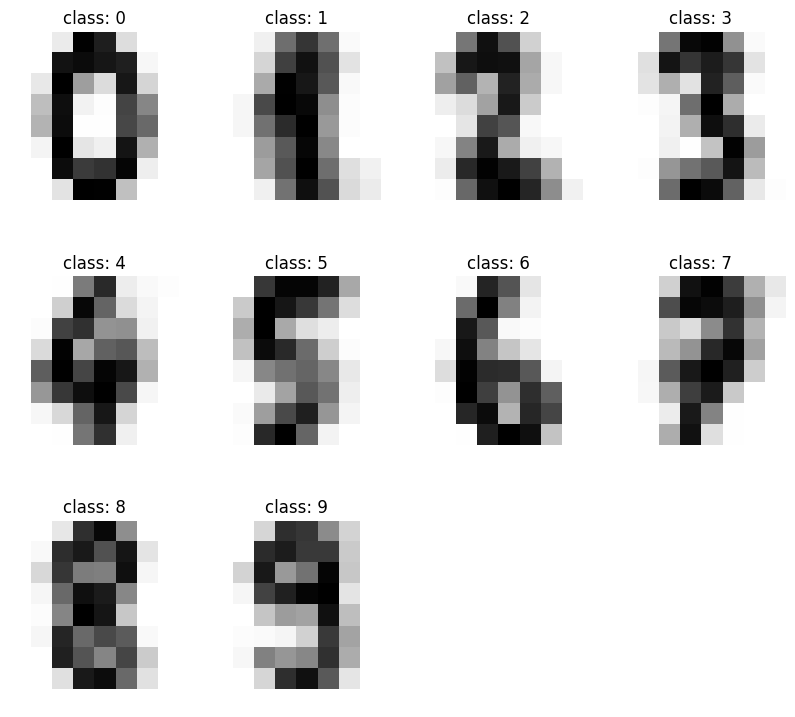

In [ ]:
rows, cols = ceil(n_classes / 4), min(n_classes, 4)
_, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(2.5 * cols, 3 * rows))
for ax, image, prediction in zip(axes.flatten(), images, range(n_classes)):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"class: {prediction}")
for ax in axes.flatten():
    ax.set_axis_off()

#### Why are my weights blurry?

If your weights look blurry... you may have missed something in the previous section. Look at the note at the end of the Simulate section!

# Inference


In [ ]:
def show(image, predicted):
    fig, ax = plt.subplots(figsize=(1.5, 2))
    ax.set_axis_off()
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"predicted: {predicted}")

def binarize(a: list, classes: list):
    return [label in a for label in classes]

To perform inference, we've found that a different input encoding is required.

Let's turn off STDP, modify the thresholds for the input and output layers, and make a copy of the network for safekeeping.

In [ ]:
test_data, test_targets = iter(X_test), iter(y_test)  # iterators for data

inf_nn = snn.copy()  # make a copy of our snn to keep it safe

encoding_period = 20  # the number of time steps to send spikes over
input_scaling = 0.1
inf_nn.stdp = False
# input
inf_nn.neuron_thresholds[:64] = [0.5] * 64
inf_nn.neuron_leaks[:64] = [0.0] * 64
# output
inf_nn.neuron_thresholds[64:] = [35.0] * n_classes
inf_nn.neuron_leaks[64:] = [0.0] * n_classes
# swap model of our input/output lists
inf_inputs, inf_outputs = inputs.using_model(inf_nn), outputs.using_model(inf_nn)
inf_nn.reset()
inf_nn.memoize(inf_nn.synaptic_weights)
test_nn = inf_nn.copy()

To encode the image, we use the same amplitude encoding method as before, but with the amplitude scaled by $1/10$, and we send $20$ of those spikes instead of just $1$.



To decode the output, let's use a hierarchical scheme and choose the number associated with the output that received:

1. the neuron with the most spikes.
   2. of those neurons, the spikes the soonest

This next code block will send in a new image from the test set every time you run it, and then guess what digit it is using the above scheme.

 t|id0 1 2 3 4 5 6 7 8 9  
 0: [│ │ │ │ │ │ │ │ │ │ ]
 1: [│ │ │ │ │ │ │ │ │ │ ]
 2: [│ │ │ │ │ │ │ │ │ │ ]
 3: [│ │ │ │ │ │ │ │ │ │ ]
 4: [│ │ │ │ │ │ │ │ │ │ ]
 5: [├─├─│ ├─│ │ │ │ ├─│ ]
 6: [│ │ ├─│ ├─├─├─├─│ ├─]
 7: [├─├─│ ├─│ │ │ │ ├─│ ]
 8: [│ │ │ │ │ │ │ │ │ │ ]
 9: [│ │ │ │ │ │ │ │ │ │ ]
10: [│ │ ├─│ ├─├─├─├─├─├─]
11: [│ │ │ │ │ │ │ │ │ │ ]
12: [├─├─│ ├─│ │ │ │ │ │ ]
13: [│ │ │ │ │ │ │ │ │ ├─]
14: [│ │ ├─│ │ ├─├─├─├─│ ]
15: [├─├─│ ├─├─│ │ │ ├─├─]
16: [│ │ │ │ │ │ │ │ │ │ ]
17: [│ │ │ │ │ │ │ │ │ │ ]
18: [│ │ ├─│ │ ├─├─├─│ │ ]
19: [│ │ │ │ │ │ │ │ │ │ ]
20: [├─├─│ ├─├─│ │ │ ├─├─]
21: [│ │ │ │ │ │ │ │ │ │ ]
target: 8
[0.0, 0.0, 24.28325000000025, 0.0, 0.0, 29.544500000000365, 26.44074999999989, 24.932000000000166, 0.0, 0.0]
predicted: [8]


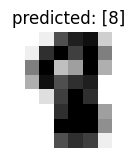

In [ ]:
inf_nn.reset()
image = next(test_data)
encode_digit_spike_amplitude(
    inputs=inf_inputs,  # the input neurons to send data to
    values=image,  # the values to encode to spikes for said neurons
    start_time=0,  # the time step to begin sending spikes
    period=encoding_period,
    scale=1 / input_max * input_scaling,  # scale the spike amplitude
)
target= next(test_targets)
inf_nn.simulate(encoding_period + 2)
snm.print_spike_train(inf_nn.ispikes[:, 64:])  # select only the outputs
print(f"target: {target}")
print(inf_nn.neuron_states[64:])

most_spikes = max([sum(n.spikes) for n in inf_outputs])  # find the highest number of spikes emitted by a neuron
matching_neurons = [n for n in inf_outputs if sum(n.spikes) == most_spikes]  # which neurons emitted that amount
fastest = min([n.spikes.nonzero()[0].sum() for n in matching_neurons])  # add together times of spiking. note that all matching_neurons spike the same number of times.
winners = [n for n in matching_neurons if n.spikes.nonzero()[0].sum() == fastest]  # find the neurons that spiked the soonest
answers = [inf_outputs.index(n, stop=999) for n in winners]  # find the index of those neurons in inf_outputs; earlier chosen to represent target label
print(f"predicted: {answers}")

show(image, answers)

If multiple neurons have the exact same spike pattern, then this output decoding method will have multiple answers.

# Evaluating model performance

In [ ]:
def infer_single(model, test_image):
    test_nn = model
    # test_nn = model.copy()  # copy model
    # get our inputs, outputs
    test_inputs, test_outputs = inputs.copy(test_nn), outputs.copy(test_nn)

    encode_digit_spike_amplitude(
        inputs=test_inputs,  # the input neurons to send data to
        values=test_image,  # the values to encode to spikes for said neurons
        start_time=0,  # the time step to begin sending spikes
        period=encoding_period,  # the number of time steps to send spikes over
        scale=1 / input_max * input_scaling,  # scale the spike amplitude
    )
    test_nn.simulate(encoding_period + 2)

    most_spikes = max([sum(n.spikes) for n in test_outputs])
    matching_neurons = [n for n in test_outputs if sum(n.spikes) == most_spikes]
    fastest = min([n.spikes.nonzero()[0].sum() for n in matching_neurons])
    winners = [n for n in matching_neurons if n.spikes.nonzero()[0].sum() == fastest]
    answers = [test_outputs.index(n, stop=999) for n in winners]
    test_nn.clear_spike_train()
    return answers

In [ ]:
# scoring
tp = 0
tn = 0
fp = 0
fn = 0
predictions = []
binary_predictions = []

classes = np.unique(y_test)

# evaluation
for image, real_answer in tqdm(zip(X_test, y_test), total=len(y_test)):
    answers = infer_single(test_nn, image)

    # score answer(s)
    for label in classes:
        tp += label == real_answer and label in answers
        fn += label == real_answer and label not in answers
        tn += label != real_answer and label not in answers
        fp += label != real_answer and label in answers

    # add predictions (for confusion matrix)
    binary_predictions.append((binarize([real_answer], classes), binarize(answers, classes)))
    for answer in answers:
        predictions.append((real_answer, answer))

print()
print(f"Precision: {tp / (tp + fp):>.6f} | Recall: {tp / (tp + fn):>.6f} | Accuracy: {(tp + tn) / (tp + tn + fp + fn):>.6f} | F1: {tp / (tp + (0.5 * (fp + fn))):>.6f}")

100%|██████████| 899/899 [00:06<00:00, 140.83it/s]


Precision: 0.662863 | Recall: 0.710790 | Accuracy: 0.934928 | F1: 0.685990


Confusion matrix:
[[84  0  0  0  1  0  4  0  0  0]
 [ 1 57 18  5  2  0  5  1  5  6]
 [ 5  4 58 13  0  2  1  0  5  1]
 [ 2  5  3 70  0  7  2  2  5  2]
 [ 9  3  1  0 67  3  6  4  4  1]
 [ 5  1  0  4  0 66  9  0  2  6]
 [ 6  5  0  0  1  0 82  0  0  0]
 [ 0  3  3  2  1 11  1 64  8  0]
 [ 5  7  8 10  4 10  7  0 45  5]
 [13  5  0 29  0  6  3  0  7 46]]


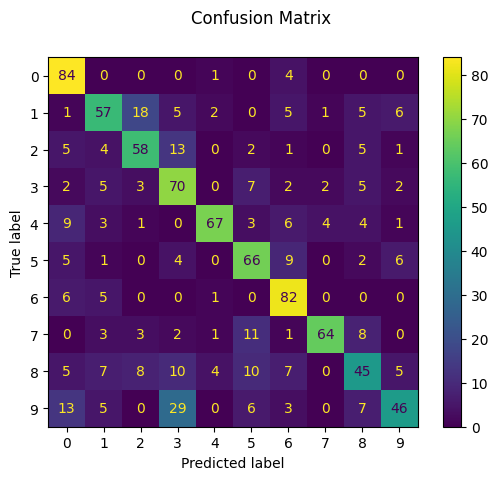

In [ ]:
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(*zip(*predictions))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
b_test, b_pred = np.array(list(zip(*binary_predictions)))

print(
    f"Classification report:\n"
    f"{sklearn.metrics.classification_report(b_test, b_pred)}\n"
)

tp, tn, fp, fn

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77        88
           1       0.63      0.63      0.63        91
           2       0.64      0.67      0.66        86
           3       0.53      0.77      0.62        91
           4       0.88      0.73      0.80        92
           5       0.63      0.73      0.67        91
           6       0.68      0.90      0.78        91
           7       0.90      0.72      0.80        89
           8       0.56      0.51      0.53        88
           9       0.69      0.50      0.58        92

   micro avg       0.66      0.71      0.69       899
   macro avg       0.68      0.71      0.68       899
weighted avg       0.68      0.71      0.68       899
 samples avg       0.69      0.71      0.69       899




(np.int64(639), np.int64(7766), np.int64(325), np.int64(260))

---

# Exporting to NeuroCoreX

This section generates an input spike train for inferencing on the NeuroCoreX platform.

In [ ]:
ncx_nn = test_nn.copy()  # copy model
# get our inputs, outputs
ncx_inputs, ncx_outputs = inputs.copy(ncx_nn), outputs.copy(ncx_nn)

time = 0
for test_image in X_test[200:]:  # limit size of export file
    encode_digit_spike_amplitude(
        inputs=ncx_inputs,
        values=test_image,
        start_time=time,
        period=encoding_period,
        scale=1 / input_max * input_scaling,  # scale the spike amplitude
    )
    time += encoding_period
    time += 2  # add extra step for seeing the output

ncx_nn.simulate(max(ncx_nn.input_spikes))

extra = {
    "input_indices": inputs.indices,
    "output_indices": outputs.indices,
    "encoding_period": encoding_period,
    "period": encoding_period + 2,
}

In [ ]:
# ncx_nn.reset()
print(ncx_nn.to_json(extra=extra))

{
  "$schema": "https://ornl.github.io/superneuromat/schema/0.1/snn.json",
  "version": "0.1",
  "networks": [
    {
      "meta": {
        "array_representation": "json-native",
        "from": {
          "module": "superneuromat",
          "version": "3.3.0"
        },
        "format": "snm",
        "format_version": "0.1",
        "type": "SNN"
      },
      "data": {
        "neuron_states": [0.0,0.0200000000000000004163336342344337026588618755340576171875,0.1333333333333333314829616256247390992939472198486328125,0.09333333333333333758918826106310007162392139434814453125,0.480000000000000037747582837255322374403476715087890625,0.47999999999999953814722175593487918376922607421875,0.453333333333332755277211845168494619429111480712890625,0.42666666666666619445180685943341813981533050537109375,0.2400000000000000188737914186276611872017383575439453125,0.279999999999999971134201359745929948985576629638671875,0.320000000000000006661338147750939242541790008544921875,0.093333333333333

In [ ]:
with open("digits.snn.json", 'w') as f:
    ncx_nn.saveas_json(f, extra=extra)

If you want to try running this on the NeuroCoreX hardware or simulator, you can download the `digits.snn.json` for use in the NeuroCoreX digits tutorial! Visit [github.com/ORNL/superneuro](https://github.com/ORNL/superneuro/tree/main) to download the NeuroCoreX digits tutorial.

---

Thanks everyone for following along!

If you have any questions or problems with the **tutorial**, please file an issue [here](https://github.com/ORNL/superneuro/issues?q=sort%3Aupdated-desc+is%3Aissue+is%3Aopen) and tag `@kenblu24`.

If you have any problems or questions about the SuperNeuroMAT **simulator** itself, please file an issue or start a discussion on the [SuperNeuroMAT Github](https://github.com/ORNL/superneuromat/issues?q=sort%3Aupdated-desc+is%3Aissue+is%3Aopen).